# 📑 Proyecto: Análisis de Mercado Inmobiliario - Properati

In [9]:
# 1. Importação de bibliotecas
# ==============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [10]:
# 2. Carregar Dataset
# ==============================
df = pd.read_csv("DS_Proyecto_01_Datos_Properati.csv")

print("Dimensão da base:", df.shape)
print("Colunas disponíveis:", df.columns.tolist())

Dimensão da base: (146660, 19)
Colunas disponíveis: ['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price', 'currency', 'title', 'description', 'property_type', 'operation_type']


In [11]:
# 3. Parte 1 - Pensando como Data Scientist
# ==============================
"""
Nesta seção você deve responder em texto (Markdown ou comentário):
- Quais variáveis são mais relevantes para prever o preço de um imóvel?
- Quais dados extras ajudariam se você tivesse disponível?
"""

'\nNesta seção você deve responder em texto (Markdown ou comentário):\n- Quais variáveis são mais relevantes para prever o preço de um imóvel?\n- Quais dados extras ajudariam se você tivesse disponível?\n'


Valores nulos por coluna:
surface_covered    21614
surface_total      20527
lon                 9959
lat                 9925
bathrooms           5957
start_date             0
end_date               0
created_on             0
l3                     0
l2                     0
l1                     0
bedrooms               0
rooms                  0
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

Estatísticas descritivas:
        start_date    end_date  created_on            lat            lon  \
count       146660      146660      146660  136735.000000  136701.000000   
unique         366         412         366            NaN            NaN   
top     2019-07-31  9999-12-31  2019-07-31            NaN            NaN   
freq         11022       25101       11022            NaN            NaN   
mean           NaN         NaN         NaN     -34.604896     -58.465304   
st

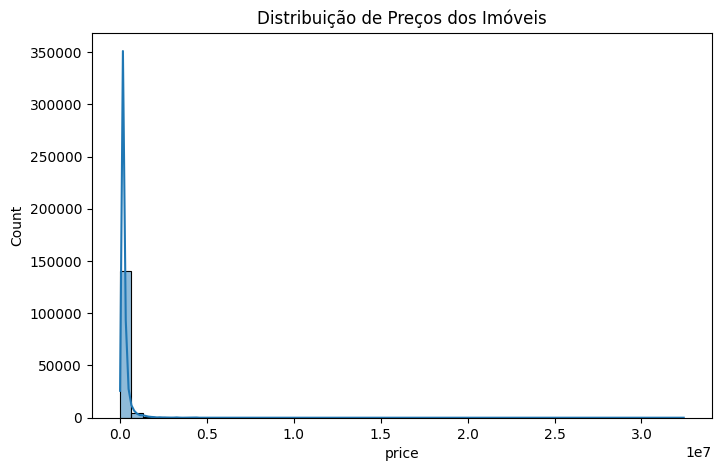

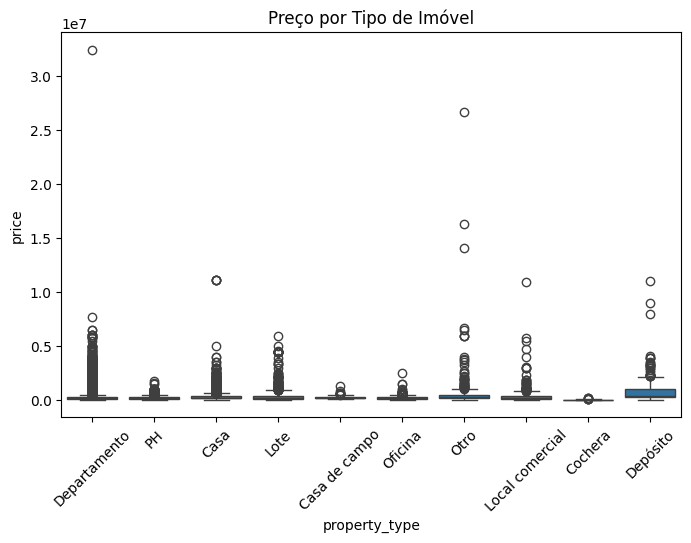

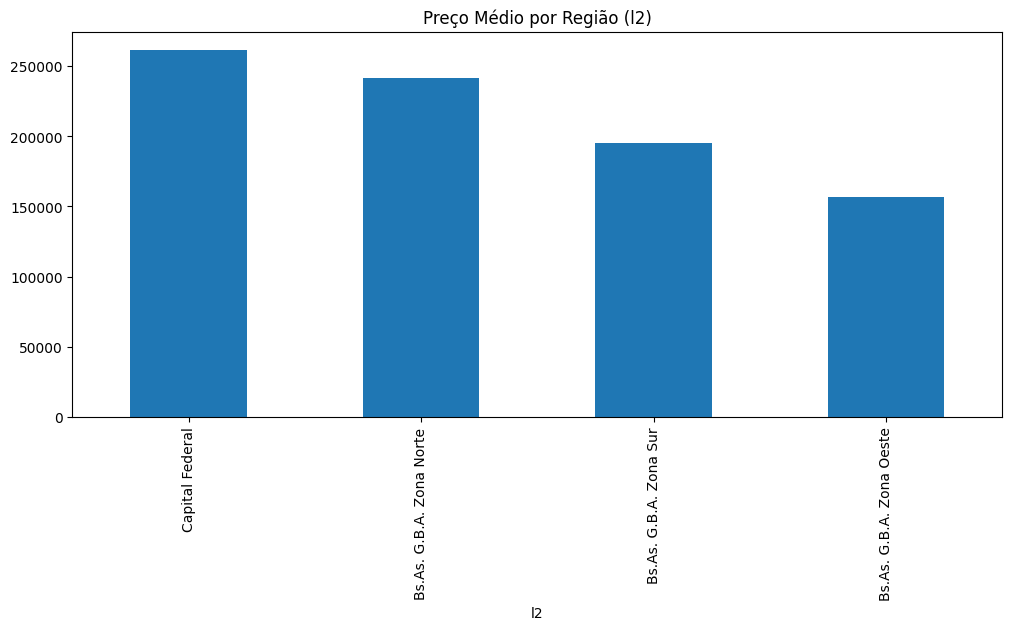

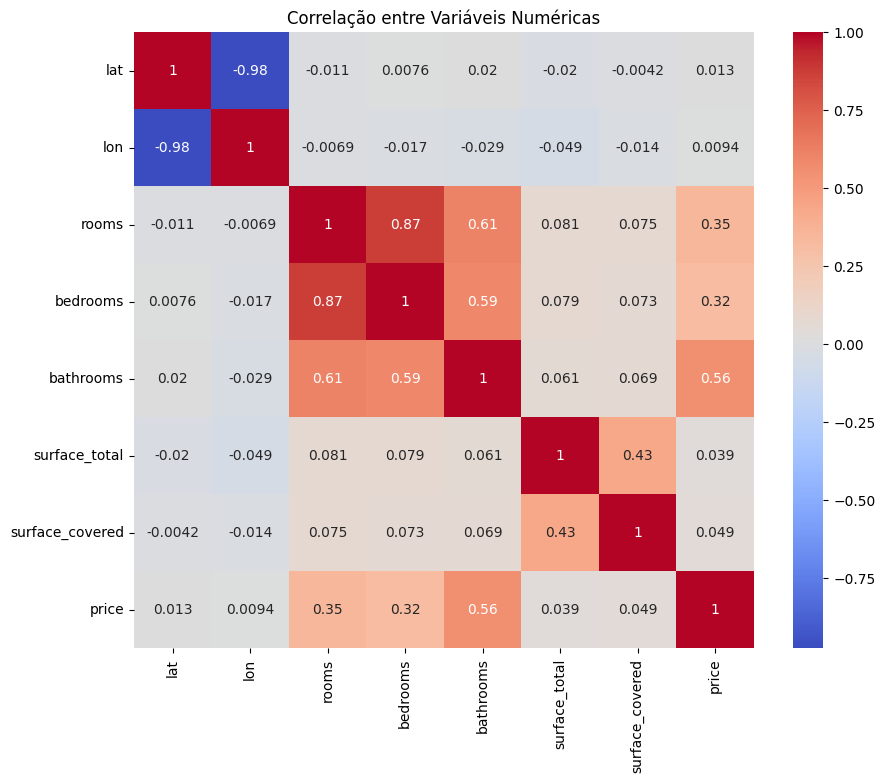

In [12]:
# 4. Parte 2 - Análisis Exploratorio de Datos (EDA)
# ==============================

# Valores ausentes
print("\nValores nulos por coluna:")
print(df.isna().sum().sort_values(ascending=False))

# Estatísticas descritivas
print("\nEstatísticas descritivas:")
print(df.describe(include="all"))

# Distribuição de preços
plt.figure(figsize=(8,5))
sns.histplot(df["price"], bins=50, kde=True)
plt.title("Distribuição de Preços dos Imóveis")
plt.show()

# Boxplot: preço por tipo de imóvel
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="property_type", y="price")
plt.xticks(rotation=45)
plt.title("Preço por Tipo de Imóvel")
plt.show()

# Preço médio por região
plt.figure(figsize=(12,5))
df.groupby("l2")["price"].mean().sort_values(ascending=False).plot(kind="bar")
plt.title("Preço Médio por Região (l2)")
plt.show()

# Correlação numérica
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlação entre Variáveis Numéricas")
plt.show()

In [13]:
# 5. Parte 3 - Preparação dos Dados
# ==============================

# Criar variável price_m2
df["price_m2"] = df["price"] / df["surface_total"]

# Selecionar features
features = ["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered"]
X = df[features].fillna(0)
y = df["price"]

# Dividir treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# 6. Modelagem de Machine Learning
# ==============================

# Regressão Linear
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("\n=== Regressão Linear ===")
print("R²:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

# Árvore de Decisão
dt = DecisionTreeRegressor(max_depth=10, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("\n=== Árvore de Decisão ===")
print("R²:", r2_score(y_test, y_pred_dt))
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n=== Random Forest ===")
print("R²:", r2_score(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))



=== Regressão Linear ===
R²: 0.23713533296484812
MAE: 111864.06532450295
RMSE: 267720.3007284014

=== Árvore de Decisão ===
R²: 0.44270518474203857
MAE: 84380.61760112803
RMSE: 228823.20026583577

=== Random Forest ===
R²: 0.573646320036957
MAE: 67057.9687601301
RMSE: 200143.99385288756


In [15]:
# Salvar modelo Random Forest
import joblib
joblib.dump(rf, "rf_model.joblib")

# Salvar nomes das features usadas
import pandas as pd
pd.Series(X.columns).to_csv("rf_features.csv", index=False, header=False)

# Salvar dados de teste e previsões
pd.DataFrame({"valor": y_test}).to_csv("y_test.csv", index=False)
pd.DataFrame({"valor": y_pred_rf}).to_csv("y_pred_rf.csv", index=False)

print("✅ Modelo e dados salvos com sucesso!")


✅ Modelo e dados salvos com sucesso!


# 🔎 Resultados dos Modelos

### 1. Regressão Linear
- **R²:** 0.23  
- **MAE:** 111.864  
- **RMSE:** 267.720  

➡️ O modelo linear consegue explicar apenas **23% da variação nos preços**.  
Apesar de simples, ele apresenta um erro absoluto médio acima de **USD 110 mil**, o que o torna **pouco confiável para predição individual**.  
Esse resultado era esperado, pois a relação entre preço e variáveis imobiliárias (quartos, banheiros, área) **não é puramente linear**.

---

### 2. Árvore de Decisão
- **R²:** 0.44  
- **MAE:** 84.381  
- **RMSE:** 228.823  

➡️ O modelo já apresenta uma **melhora significativa** em relação à regressão linear, explicando **44% da variação dos preços**.  
O erro absoluto médio cai para cerca de **USD 84 mil**, mostrando que o modelo **captura padrões mais complexos** nos dados.  
Porém, árvores isoladas podem sofrer de **overfitting**, por isso ainda não é o modelo ideal.

---

### 3. Random Forest
- **R²:** 0.57  
- **MAE:** 67.058  
- **RMSE:** 200.144  

➡️ O melhor modelo entre os testados, conseguindo explicar **57% da variação nos preços**.  
Reduz consideravelmente o erro médio absoluto para **cerca de USD 67 mil**.  
Isso mostra que o **ensemble de múltiplas árvores** consegue generalizar melhor do que modelos mais simples.  

---

## 📊 Conclusões
- O modelo de **Random Forest** é o mais adequado para o problema, mas ainda apresenta erros altos em valores absolutos — comum em datasets imobiliários, onde existem **outliers e alta variabilidade de preços**.  
- Variáveis como **superfície total, número de banheiros e tipo de imóvel** provavelmente estão entre as mais relevantes (podemos confirmar via *feature importance*).  
- O próximo passo seria **testar modelos mais avançados** (XGBoost, LightGBM) e aplicar **feature engineering** mais robusta (ex.: preço por m², variáveis de localização mais detalhadas, amenities).  

---

# 📌 Sugestões de Ajustes
1. **Gráficos adicionais:**
   - Importância das variáveis no Random Forest (`feature_importances_`).  
   - Boxplot de preços por número de quartos/banheiros.  
   - Histograma dos erros (resíduos) para verificar onde o modelo falha mais.  

2. **Métricas adicionais:**
   - MAPE (Mean Absolute Percentage Error) → mostra o erro em termos percentuais.  
   - Comparar os resultados em um gráfico de barras (MAE, RMSE, R² por modelo).  

3. **Storytelling:**
   - Destacar que mesmo os melhores modelos ainda erram bastante porque o preço de um imóvel depende de fatores **não incluídos na base** (segurança do bairro, proximidade de transporte, qualidade da construção).  
   - Isso mostra a importância de **dados complementares** para projetos reais.  
